Centro de Incidendia y Monitoreo Fiscal  
Diciembre 2021

# Gastos reservados 2012-2017

Los ex-presidentes Elías Saca (2004-2009) y Mauricio Funes (2009-2014) han enfrentado cargos ante la justicia por el uso indebido de las partida de gastos reservados. Hasta ahora, la información disponible para el público sobre el manejo de dichos fondos sigue siendo limitada. Es más, a partir de 2019 se cambió el mecanismo de financiamiento de este tipo de gastos y se cerró complementamente el acceso a cualquier dato al respecto.

En este notebook se retoma el dataset publicado junto con el documento de opinión _[De los gastos reservados de la partida 54315 de la Presidencia a los gastos reservados del OIE](http://www.repo.funde.org/id/eprint/1776/)_ (FUNDE, 2021). Este dataset incluye información del período comprendido entre 2012 y 2017.


## Descarga y preparación de los datos

En esta sección se descagan los datos del repositorio de FUNDE, se ajustan los nombres de los atributos y se describe la estructura del dataset.

In [101]:
import pandas as pd
from vega import VegaLite

In [102]:
# Dataset URL
url = "http://www.repo.funde.org/id/eprint/1776/13/F-GR-P-12-17.xlsx"
# It's a Excel file. Data is contained in 'base' sheet
data = pd.read_excel(url, sheet_name="base")
data.head()

,Código Institución,Institución,Código y Nombre Fuente Financiamiento,Linea Trabajo,Código Objeto Presupuestario,Objeto Presupuestario,Año,Monto programado o votado,Presupuesto Modificado,Monto Devengado
0,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0102 ADMINISTRACIÓN GENERAL,54315,GASTOS RESERVADOS,2012,0.0,10752157.00,10752157.00
1,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0104 SECRETARÍA PARA ASUNTOS LEGISLATIVOS Y ...,54315,GASTOS RESERVADOS,2012,0.0,1020625.00,1020625.00
2,500,PRESIDENCIA DE LA REPUBLICA,1 FONDO GENERAL,0107 INNOVACIÓN TECNOLÓGICA E INFORMÁTICA,54315,GASTOS RESERVADOS,2012,0.0,1749678.06,1749678.06
3,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0202 CANAL 10 TELEVISIÓN EDUCATIVA Y CULTURAL,54315,GASTOS RESERVADOS,2012,0.0,904925.00,904925.00
4,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0301 ASUNTOS ESTRATÉGICOS,54315,GASTOS RESERVADOS,2012,0.0,4808060.00,4808060.00


In [103]:
# Checking column names
data.columns

Index(['Código Institución', 'Institución',
       'Código y Nombre Fuente Financiamiento', 'Linea Trabajo',
       'Código Objeto Presupuestario', 'Objeto Presupuestario', 'Año',
       'Monto programado o votado', 'Presupuesto Modificado',
       'Monto Devengado'],
      dtype='object')

In [104]:
# Replacing attribute names with standarized labels
data.rename(columns={
    "Código Institución": "office",
    "Institución": "office_name",
    "Código y Nombre Fuente Financiamiento": "source",
    "Linea Trabajo": "program",
    "Código Objeto Presupuestario": "object",
    "Objeto Presupuestario": "object_name",
    "Año": "year",
    "Monto programado o votado": "approved",
    "Presupuesto Modificado": "modified",
    "Monto Devengado": "accrued"
}, inplace=True)
data.head()

,office,office_name,source,program,object,object_name,year,approved,modified,accrued
0,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0102 ADMINISTRACIÓN GENERAL,54315,GASTOS RESERVADOS,2012,0.0,10752157.00,10752157.00
1,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0104 SECRETARÍA PARA ASUNTOS LEGISLATIVOS Y ...,54315,GASTOS RESERVADOS,2012,0.0,1020625.00,1020625.00
2,500,PRESIDENCIA DE LA REPUBLICA,1 FONDO GENERAL,0107 INNOVACIÓN TECNOLÓGICA E INFORMÁTICA,54315,GASTOS RESERVADOS,2012,0.0,1749678.06,1749678.06
3,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0202 CANAL 10 TELEVISIÓN EDUCATIVA Y CULTURAL,54315,GASTOS RESERVADOS,2012,0.0,904925.00,904925.00
4,500,PRESIDENCIA DE LA REPUBLICA,3 PRESTAMOS EXTERNOS,0301 ASUNTOS ESTRATÉGICOS,54315,GASTOS RESERVADOS,2012,0.0,4808060.00,4808060.00


In [105]:
data.columns

Index(['office', 'office_name', 'source', 'program', 'object', 'object_name',
       'year', 'approved', 'modified', 'accrued'],
      dtype='object')

In [92]:
# Saving the dataset
data.to_csv("gastos-reservados-presidencia-2012-2017.csv", index=False)

In [100]:
data = data.melt(
    id_vars=["year", "office", "office_name", "source", "program", "object", "object_name"], 
    value_vars=["approved", "modified", "accrued"], 
    var_name="moment", 
    value_name="value"
)

<ipython-input-100-1275c670d7fb>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  data = data.melt(


KeyError: "The following 'id_vars' are not present in the DataFrame: ['object', 'object_name', 'office', 'office_name', 'program']"

In [94]:
data.head()

,year,source,moment,value
0,2012,3 PRESTAMOS EXTERNOS,approved,0.0
1,2012,3 PRESTAMOS EXTERNOS,approved,0.0
2,2012,1 FONDO GENERAL,approved,0.0
3,2012,3 PRESTAMOS EXTERNOS,approved,0.0
4,2012,3 PRESTAMOS EXTERNOS,approved,0.0


## Agrupaciones

En esta sección se agrupan los datos con base en varios criterios.

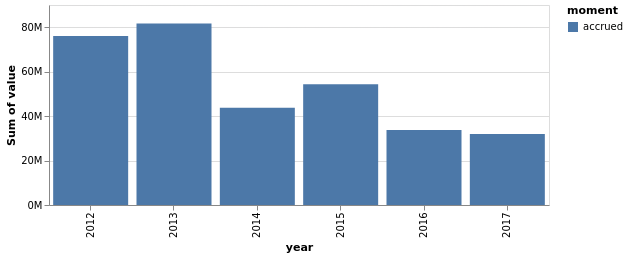

In [99]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "mark": "bar",
    "width": 500,
    "encoding": {
        "y": {"aggregate": "sum", "type": "quantitative", "field": "value"},
        "x": {"type": "nominal", "field": "year"},
        "color": {"field": "moment"}
    },
    "transform": [

    ],
    "config": {
        "numberFormat": "~s",
    }
}, data)

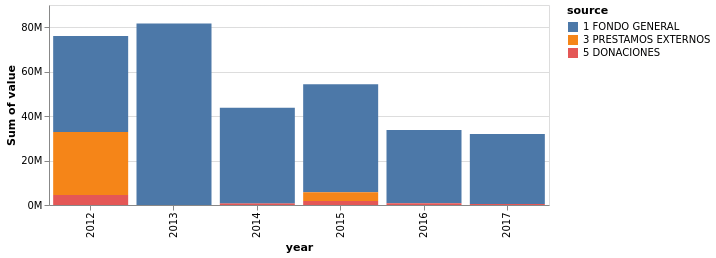

In [97]:
VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "mark": "bar",
    "width": 500,
    "encoding": {
        "y": {"aggregate": "sum", "type": "quantitative", "field": "value"},
        "x": {"type": "nominal", "field": "year"},
        "color": {"field": "source"}
    },
    "transform": [
        {"filter": "datum.moment == 'accrued'"}
    ],
    "config": {
        "numberFormat": "~s",
    }
}, data)